In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
data = pd.read_csv("train_clean_data.csv")

In [ ]:
#data.shape

In [ ]:
text = data['Text'][80000:120000].astype('U')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=10000,ngram_range=(1,5))
X=tfidf_v.fit_transform(text).toarray()

In [ ]:
y=data['label'][80000:120000]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.15,random_state=7)

In [ ]:
print(ytrain)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=50)

In [ ]:

linear_clf.fit(xtrain, ytrain)
pred = linear_clf.predict(xtest)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred)
#plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

accuracy:   0.748


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()


In [ ]:
classifier.fit(xtrain, ytrain)
pred = classifier.predict(xtest)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.714


In [ ]:
# As we see from result alpha is 0.1 is best hyperparameter.
classifier=MultinomialNB(alpha=0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(xtrain,ytrain)
    y_pred=sub_classifier.predict(xtest)
    score = metrics.accuracy_score(ytest, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.7658
Alpha: 0.1, Score : 0.766
Alpha: 0.2, Score : 0.7658666666666667
Alpha: 0.30000000000000004, Score : 0.7658666666666667
Alpha: 0.4, Score : 0.7658666666666667
Alpha: 0.5, Score : 0.7663333333333333
Alpha: 0.6000000000000001, Score : 0.7663333333333333
Alpha: 0.7000000000000001, Score : 0.7666
Alpha: 0.8, Score : 0.7664666666666666
Alpha: 0.9, Score : 0.7664666666666666


In [ ]:
testdata = pd.read_csv("ocr_final_data.csv")

In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import re
stemmer  = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


True

In [ ]:
predtext=[]
for i in range(239):
    sentence = re.sub('[^a-zA-Z123456789\n]', ' ', str(testdata['Text'][i]))
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [stemmer.stem(word) for word in sentence if not word in stopwords.words('english')]
    sentence = ' '.join(sentence)
    predtext.append(sentence)

In [ ]:
#cv1 = CountVectorizer(max_features=5000,ngram_range=(1,3))
#Xpredict = cv1.fit_transform(predtext).toarray()
Xpredict=tfidf_v.fit_transform(predtext).toarray()

In [ ]:
Xpredict.shape

(239, 9702)

In [ ]:
x_predicted = np.zeros((239,10000))

In [ ]:
x_predicted[:,0:9702] = Xpredict

In [ ]:
finalpred = classifier.predict(x_predicted)

In [ ]:
finalpred

array([0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 4, 0,
       0, 0, 0, 0, 4, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4,
       0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0, 4,
       4, 0, 0, 4, 4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 0,
       0, 4, 4, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0])

In [ ]:
finalprediction = []
for i in range(239):
  if(finalpred[i]==4):
    finalprediction.append('Positive')
  else:
    finalprediction.append('Negative')

In [ ]:
testdata['finalprediction'] = finalprediction


In [ ]:
j=0
for i in range(239):
  if type(testdata['Text'][i])==float:
    testdata['finalprediction'][i]="Random"
    j=j+1

print(j)

47


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


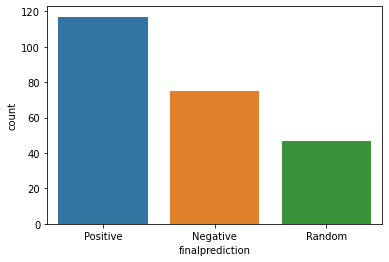

In [ ]:
sns.countplot(testdata['finalprediction'])

In [ ]:
mydata = testdata['Filename']

In [ ]:
finalcsv = pd.DataFrame(mydata)

In [ ]:
finalcsv['Category'] = testdata['finalprediction']

In [ ]:
from google.colab import files

finalcsv.to_csv('submission10.csv')
files.download('submission10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>